# Исследование закономерностей компьютерных игр

Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й.

## Откроем файл с данными и изучим общую информацию

In [2]:
import pandas as pd #импорт библиотеки pandas
import matplotlib.pyplot as plt #импорт модуля pyplot из matplotlib
import numpy as np
from scipy import stats as st
import seaborn as sns

In [3]:
data = pd.read_csv('/datasets/games.csv') #читаем csv-файл

In [4]:
data.head(20) #смотрим в каком формате и состоянии данные

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
data.tail(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.00,0.0,67.0,tbd,E
16696,Breach,PC,2011.0,Shooter,0.01,0.00,0.00,0.0,61.0,5.8,T
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.00,0.0,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.00,0.0,48.0,tbd,E
16699,The Longest 5 Minutes,PSV,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16700,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16702,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.00,0.0,60.0,7.2,E10+
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.0,NaN,tbd,E


Исходя из данных, видно достаточно большое количество пропущенных значений в последних трёх столбцах в базе данных

In [6]:
data.info() # выводим основную информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В некоторых колонках необхоимо изменить тип ланных перед непосредственной работой с данными. Произведем эту работу в пункте "Предобработка данных"

In [7]:
#оценим количество строк и столбцов изначального датафрейма
data.shape

(16715, 11)

## Предобработка данных

### Изменение названий столбцов

In [8]:
#приведем названия столбцов датафрейма к нижнему регистру по правилам хорошего тона Python
data.columns = data.columns.str.lower()

In [9]:
#оценим изменения
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Теперь названия столбцов датафрема выглядят хорошо

### Изменение типов данных

Как уже уточнялось выше, в наших данных есть колонки, в которых нужно подобрать более оптимальный тип данных

In [10]:
#выводим общую информацию
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [11]:
#изменим тип данных в колонке "year_of_release" на int для удобства
data['year_of_release'] = data['year_of_release'].convert_dtypes()

In [12]:
#изменим тип данных в колонке "critic_score" на int для удобства, т.к. оценка экспертов - целое число
data['critic_score'] = data['critic_score'].convert_dtypes()

In [13]:
#выше в столбце "user_score" было видно странную аббревиатуру, посмотрим более детально
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Получается, помимо численных значений, пропущенных nan, у нас есть данные со значением "tbd". У этой аббревиатуры могут быть несколько разные значения, например To Be Done - должно быть сделано, или To Be Discussed - подлежит обсуждению. Для нашего столбца подходит такая расшифровка - To Be Determined, то есть "Будет определено". Вполне возможно, что для определения рейтинга игры необходимо учесть определенное минимальное количество оценок пользователей. В таком случае, если количество оценок для игры меньше установленного минимума - вместо рейтинга появляется данная аббревиатура. В нашем исследовании мы можем заменить эту аббревиатуру на значение "nan"

In [14]:
#заменим значения "tbd" на значения "nan"
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [15]:
#изменим тип данных в колонке "user_score" на float, т.к. оценка пользователей вещественное число
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [16]:
#проверим изменения
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


Теперь данные нашего датафрейма имеют необходимый тип

### Обработка пропусков

In [17]:
#оценим количество пропусков
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Итак, достаточно много пропусков  в последних трех столбцах. Начнем изучать пропуска со столбцов, с меньшим количеством пропусков

In [18]:
#посмотрим, что за игры, у которых нет названия 
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


Мы видим, что 2 пропуска в столбце "name" и "genre" это одни и те же 2 строки датафрейма. Эти строки так же не имеют никаких оценок и рейтинга. Исходя из этого, мы можем удалить эти 2 строки из нашей базы данных, т.к. их потери практически не отразятся на общей информативности и ,к сожалению, мы не можем заполнить эти данные, не имея хотя бы названия игры

In [19]:
#удалим строки с пропусками в столбце "name" по индексам строк
data = data.drop([659, 14244])

In [20]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


269 пропусков. Учитывая, что дальнейшее наше исследование будет основано на информации о годах выпуска игр, оставшиеся игры с пропусками в столбце "year_of_release" можно удалить из последующего исследования

In [21]:
#удалим строки с пропусками в столбце "year_of_release" по индексам строк
data = data.dropna(subset=['year_of_release'])

In [22]:
#изучим уникальные значения столбца "critic_score"
data['critic_score'].unique()

<IntegerArray>
[  76, <NA>,   82,   80,   89,   58,   87,   91,   61,   97,   95,   77,   88,
   83,   94,   93,   85,   86,   98,   96,   90,   84,   73,   74,   78,   92,
   71,   72,   68,   62,   49,   67,   81,   66,   56,   79,   70,   59,   64,
   75,   60,   63,   69,   50,   25,   42,   44,   55,   48,   57,   29,   47,
   65,   54,   20,   53,   37,   38,   33,   52,   30,   32,   43,   45,   51,
   40,   46,   39,   34,   41,   36,   31,   27,   35,   26,   19,   28,   23,
   24,   21,   17,   13]
Length: 82, dtype: Int64

In [23]:
#изучим уникальные значения столбца "user_score"
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

У нас есть большое количество пропущенных значений в обоих столбцах. пропуски в обоих этих столбцах могли быть образованы по разным причинам: для игр, выпущенных давно, такие рейтинги могли еще не существовать на то время; так же, не будем игнорировать вариант, при котором, игры в целом могли быть не оценены, даже новые; ну и, конечно, случайные пропуски.
Заполнять пропуски средними или медианными значениями нельзя - это сильно исказит наши данные. Заполним пропуски в столбце "critic_score" - нулём, а в столбце "user_score" - значением "-1". В дальнейшем исследовании будем помнить о том, что пропуски заполнены этими значениями и уберем их из наших расчетов

In [24]:
#заполним пропуски в столбце "critic_score"
data['critic_score'] = data['critic_score'].fillna(0)

In [25]:
#заполним пропуски в столбце "user_score"
data['user_score'] = data['user_score'].fillna(-1)

In [26]:
#изучим уникальные значения столбца "rating"
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Согласно Entertainment Software Rating Board (ESRB) — негосударственной организации, игры делятся на разные категории. В нашем датафрейме около 30% пропусков в столбце "rating". Мы не можем заполнить эти пропуски самостоятельно, поэтому заполним пропуски обозначением "NR" - "No Rating"

In [27]:
data['rating'] = data['rating'].fillna('NR')

In [28]:
#проверим, заполнились ли пропуски
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [29]:
#проверим, есть ли строки-дубликаты в базе данных
data.duplicated().sum()

0

In [30]:
#посмотрим, есть ли строки-дубликаты по комбинации "имя-платформа-год выпуска"
data_duplicates = data[data.duplicated(['name', 'platform', 'year_of_release'])]
data_duplicates

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83,5.5,E


Такие строки есть. Удалим их из нашего датафрейма

In [31]:
#удалим строки-дубликаты
data.drop_duplicates(['name', 'platform', 'year_of_release'], inplace=True)

In [32]:
#посчитаем суммарные продажи по всем регионам
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [33]:
#проверим, добавился ли столбец
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,-1.0,NR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,-1.0,NR,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,-1.0,NR,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,-1.0,NR,28.31


In [34]:
data.shape

(16443, 12)

В данном разделе были отредактированы типы данных, заполненны пропуски. Можно переходить к исследовательскому анализу данных.
В результате обработки данных датафрейм был сохранен на 98.40%

## Исследовательский анализ данных

###  Выпуск игр в разные годы

In [35]:
#создадим сводную таблицу зависимости количества выпущенных игр от года выпуска
games_by_years = data.pivot_table(index='year_of_release', values='name', aggfunc='count')

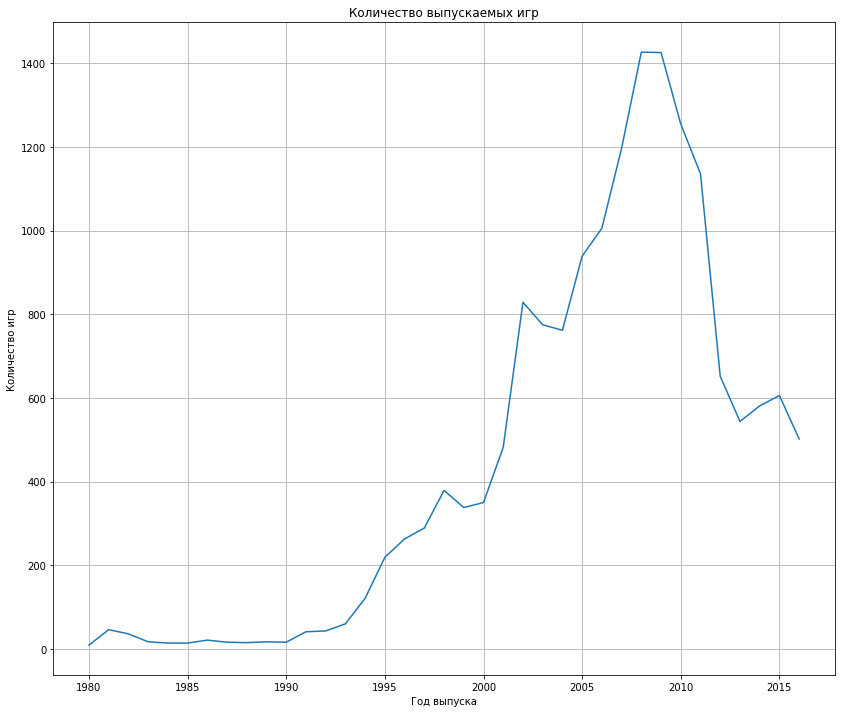

In [37]:
#построим график
games_by_years.plot(figsize=(14, 12), grid=True, legend=False)
plt.title('Количество выпускаемых игр')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

Исходя из отображаемых данных видно, что рост количества игр начался с 1990 года до 2008 и затем произошел довольно резкий спад. Спад можно объяснить появлением смартфонов в широком потреблении и наличия большого количества игр для телефонов, планшетов и пр.

### Изменение продаж по платформам и годам

In [38]:
#создадим сводную таблицу по платформам и общим количеством игр
games_by_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

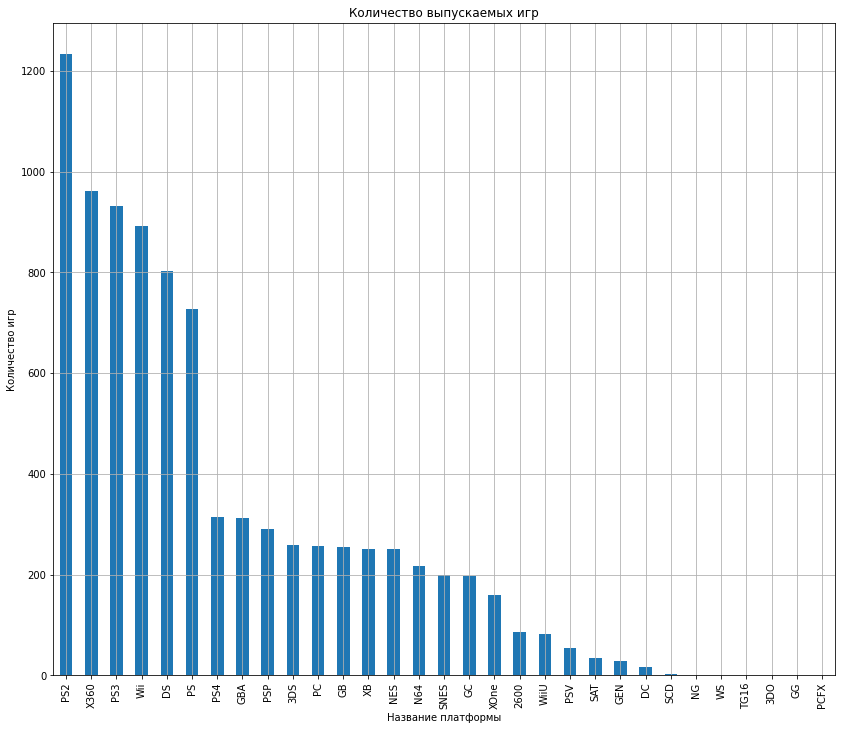

In [39]:
#создадим график
games_by_platform.plot(kind='bar', figsize=(14, 12), grid=True, legend=False)
plt.title('Количество выпускаемых игр')
plt.xlabel('Название платформы')
plt.ylabel('Количество игр')
plt.show()

На графике видно, что с большим отрывом лидирует Sony PlayStation2. На втором месте X-Box360, затем Sony PlayStation3 и Wii. Затем за ними следуют DS и PS. Построим следующий график с распределением по годам этих первых 6 платформ. Возьмем шесть, потому что разница между 5 и 6 относительно небольшая, когда как разница между 6-й PS и 7-й PS4 достаточно существенная

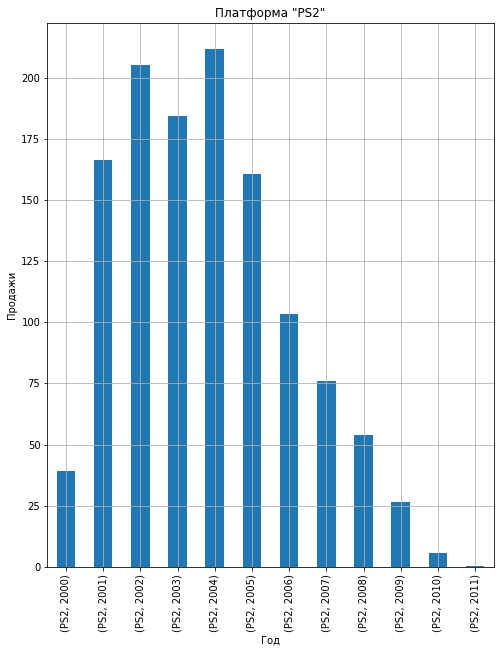

In [40]:
#построим распределение по годам для платформы "PS2"
platform_1 = pd.pivot_table(data.query('platform == "PS2"'), index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
platform_1.plot(kind='bar', figsize=(8, 10), grid=True, legend=False)
plt.title('Платформа "PS2"')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

Согласно данным из таблицы, пик продаж для этой платформы наступил на 5 год её продаж. Платформа просуществовала 11 лет

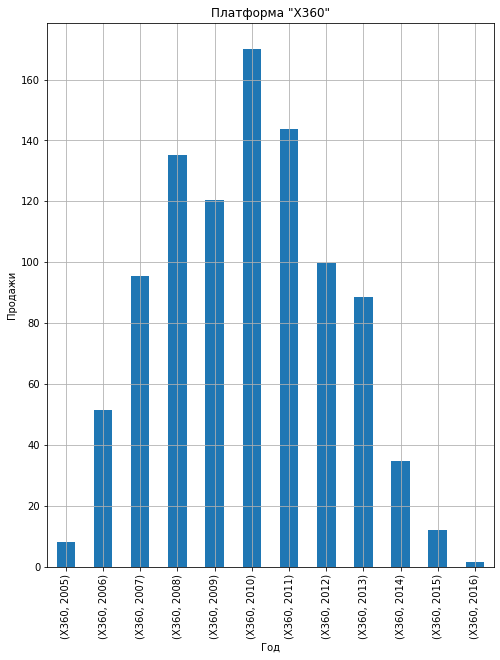

In [41]:
#построим распределение по годам для платформы "X360"
platform_2 = pd.pivot_table(data.query('platform == "X360"'), index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
platform_2.plot(kind='bar', figsize=(8, 10), grid=True, legend=False)
plt.title('Платформа "X360"')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

Для платформы X360 пик продаж пришелся на 6-й год. Платформа исчезла за 11 лет

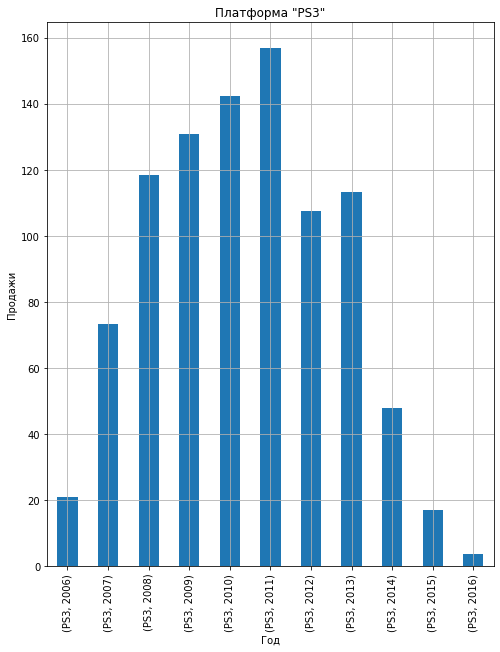

In [42]:
#построим распределение по годам для платформы "PS3"
platform_3 = pd.pivot_table(data.query('platform == "PS3"'), index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
platform_3.plot(kind='bar', figsize=(8, 10), grid=True, legend=False)
plt.title('Платформа "PS3"')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

Для PS3 пик продаж пришелся на 7 год(2011). Отчасти это можно объяснить тем, что выход данной платформы пришелся в год пика спроса на предыдущую (PS2). И пользователям и критикам понадобилось время, чтобы понять преимущества PS3 перед PS2. Платформа просуществовала 11 лет

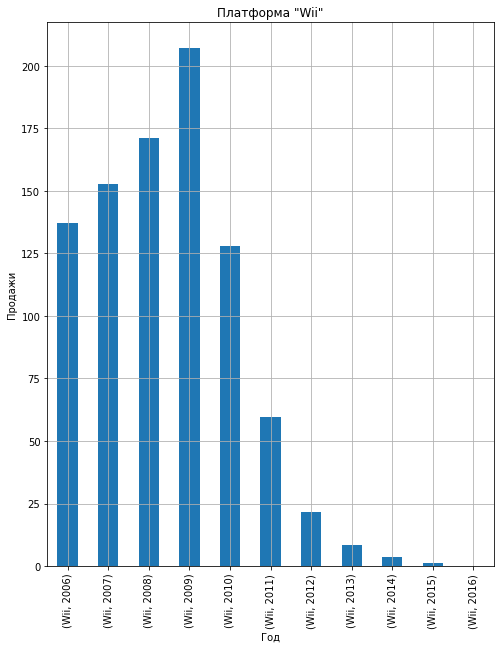

In [43]:
#построим распределение по годам для платформы "Wii"
platform_4 = pd.pivot_table(data.query('platform == "Wii"'), index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
platform_4.plot(kind='bar', figsize=(8, 10), grid=True, legend=False)
plt.title('Платформа "Wii"')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

Наибольшее количество продаж для платформы Wii пришлось на 4 год её существования, а потом произошел достаточно быстрый спад. Продолжительность жизни составила 10 лет

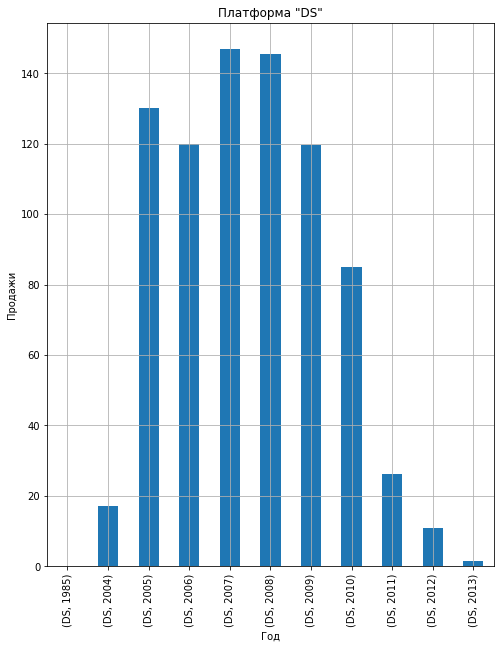

In [44]:
#построим распределение по годам для платформы "DS"
platform_5 = pd.pivot_table(data.query('platform == "DS"'), index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
platform_5.plot(kind='bar', figsize=(8, 10), grid=True, legend=False)
plt.title('Платформа "DS"')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

Для этой платформы мы не будем учитывать небольшую долю продаж в 1985 году. Пик продаж пришелся на 4 год, а существование продлилось 9 лет

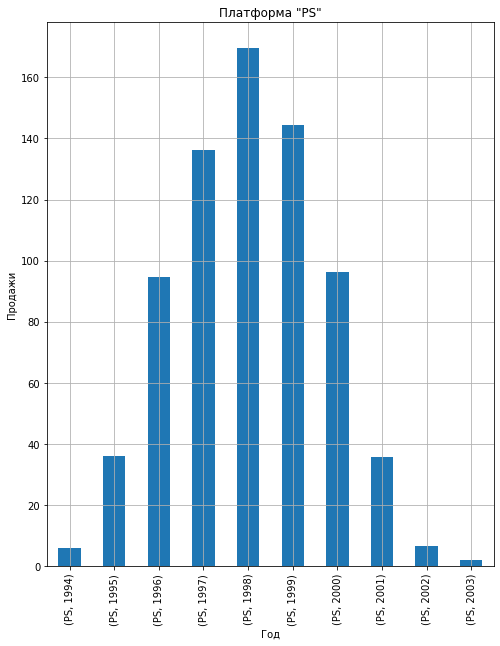

In [45]:
#построим распределение по годам для платформы "PS"
platform_6 = pd.pivot_table(data.query('platform == "PS"'), index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
platform_6.plot(kind='bar', figsize=(8, 10), grid=True, legend=False)
plt.title('Платформа "PS"')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

Для PS пик продаж пришелся на 5-й год после выпуска. Просуществовала она 9 лет

Анализируя данные, в среднем каждая из игровых платформ существует около 10 лет. А пик продаж у каждой приходится в среднем на 4-5 год после выпуска.
Учитывая эти моменты, на будущую часть исследования в качестве актуального периода будет период начиная с 2012 года - так можно будет проследить динамику развития платформ,пик продаж которых может произойти на 2017 год, т.к 17-й год будет как раз 5-м - а это значит год возможного пика одной из платформ

In [46]:
#оставляем данные в датафрейме только по актуальному периоду
data_new = data.query('year_of_release >= 2012')

In [47]:
#проверим, верно ли теперь указаны года
data_new['year_of_release'].unique()

<IntegerArray>
[2013, 2015, 2012, 2014, 2016]
Length: 5, dtype: Int64

### Потенциально прибыльные платформы

In [48]:
#определим лидирующие по продажам платформы исходя из данных актуального периода
platform_in_top = data_new.pivot_table(index='platform', values='total_sales', aggfunc='count').sort_values(by='total_sales', ascending=False)
platform_in_top

,total_sales
platform,
PS3,492
PSV,411
3DS,396
PS4,392
X360,292
PC,250
XOne,247
PSP,173
WiiU,147


Исходя из актуального периода (2012-2016)  в продажах лидируют PS3, PSV, 3DS, PS4. Рассмотрим данные более подробно - по годам для всех платформ в этом списке, чтобы не упустить платформу, количество продаж у которой растет

In [49]:
#определим продажи по годам для платформы"PS3"
platform_PS3 = pd.pivot_table(data_new.query('platform == "PS3"'), index=['platform', 'year_of_release'], values='total_sales', aggfunc='count')
platform_PS3

total_sales
platform year_of_release             
PS3      2012                     147
         2013                     126
         2014                     108
         2015                      73
         2016                      38

In [50]:
#определим продажи по годам для платформы"PSV"
platform_PSV = pd.pivot_table(data_new.query('platform == "PSV"'), index=['platform', 'year_of_release'], values='total_sales', aggfunc='count')
platform_PSV

total_sales
platform year_of_release             
PSV      2012                      53
         2013                      63
         2014                     100
         2015                     110
         2016                      85

In [51]:
#определим продажи по годам для платформы"3DS"
platform_3DS = pd.pivot_table(data_new.query('platform == "3DS"'), index=['platform', 'year_of_release'], values='total_sales', aggfunc='count')
platform_3DS

total_sales
platform year_of_release             
3DS      2012                      93
         2013                      91
         2014                      80
         2015                      86
         2016                      46

In [52]:
#определим продажи по годам для платформы"PS4"
platform_PS4 = pd.pivot_table(data_new.query('platform == "PS4"'), index=['platform', 'year_of_release'], values='total_sales', aggfunc='count')
platform_PS4

total_sales
platform year_of_release             
PS4      2013                      16
         2014                      75
         2015                     137
         2016                     164

In [53]:
#определим продажи по годам для платформы"X360"
platform_X360 = pd.pivot_table(data_new.query('platform == "X360"'), index=['platform', 'year_of_release'], values='total_sales', aggfunc='count')
platform_X360

total_sales
platform year_of_release             
X360     2012                     106
         2013                      75
         2014                      63
         2015                      35
         2016                      13

In [54]:
#определим продажи по годам для платформы"PS"
platform_PC = pd.pivot_table(data_new.query('platform == "PC"'), index=['platform', 'year_of_release'], values='total_sales', aggfunc='count')
platform_PC

total_sales
platform year_of_release             
PC       2012                      61
         2013                      38
         2014                      47
         2015                      50
         2016                      54

In [55]:
#определим продажи по годам для платформы"XOne"
platform_XOne = pd.pivot_table(data_new.query('platform == "XOne"'), index=['platform', 'year_of_release'], values='total_sales', aggfunc='count')
platform_XOne

total_sales
platform year_of_release             
XOne     2013                      19
         2014                      61
         2015                      80
         2016                      87

In [56]:
#определим продажи по годам для платформы"PSP"
platform_PSP = pd.pivot_table(data_new.query('platform == "PSP"'), index=['platform', 'year_of_release'], values='total_sales', aggfunc='count')
platform_PSP

total_sales
platform year_of_release             
PSP      2012                     106
         2013                      54
         2014                      10
         2015                       3

In [57]:
#определим продажи по годам для платформы"WiiU"
platform_WiiU = pd.pivot_table(data_new.query('platform == "WiiU"'), index=['platform', 'year_of_release'], values='total_sales', aggfunc='count')
platform_WiiU

total_sales
platform year_of_release             
WiiU     2012                      32
         2013                      42
         2014                      31
         2015                      28
         2016                      14

In [58]:
#определим продажи по годам для платформы"Wii"
platform_Wii = pd.pivot_table(data_new.query('platform == "Wii"'), index=['platform', 'year_of_release'], values='total_sales', aggfunc='count')
platform_Wii

total_sales
platform year_of_release             
Wii      2012                      31
         2013                      12
         2014                       6
         2015                       4
         2016                       1

In [59]:
#определим продажи по годам для платформы"DS"
platform_DS = pd.pivot_table(data_new.query('platform == "DS"'), index=['platform', 'year_of_release'], values='total_sales', aggfunc='count')
platform_DS

total_sales
platform year_of_release             
DS       2012                      23
         2013                       8

Исходя из рассчитанных данных, видно, как растет количество продаж у таких платформ как PS4, XOne. У платформ PSV и PC видны колебания - нет четкого спада или роста количества продаж, тем не менее, думаю, стоит учитывать их как платформы, которые возможно будет более прибыльными в 2017 году. Оценим данные на 2016 год, но не будем забывать, что это не гарантирует рост платформ, у которых количество продаж будет больше. Так же, не забываем о том, что изначально в нашей базе данных данные за 2016 год неполные. Поэтому утверждать о чем-то на 100% будет неверно

In [60]:
#оставим только данные за 2016 год
data_2016 = data.query('year_of_release >= 2016')

In [61]:
#определим лидирующие по продажам платформы за 2016 год
platform_2016= data_2016.pivot_table(index='platform', values='total_sales', aggfunc='count').sort_values(by='total_sales', ascending=False)
platform_2016

,total_sales
platform,
PS4,164
XOne,87
PSV,85
PC,54
3DS,46
PS3,38
WiiU,14
X360,13
Wii,1


Анализируя данные 2016 года видим три  потенциально выгодные платформы: PS4, XOne, PSV. Однако, это не значит, что эти платформы будут в топе и на 2017 год, т.к данные в датафрейме за 2016 год неполные

### "Ящик с усами" и глобальные продажи

In [62]:
#объеденим интересующие нас платформы
platforms_top = data_new[data_new['platform'].isin(['PS4', 'XOne','PSV'])]
platforms_top = platforms_top[platforms_top['total_sales'] < 1.8]

In [63]:
#посмотрим описание
platforms_top['total_sales'].describe()

count    974.000000
mean       0.242998
std        0.355220
min        0.010000
25%        0.030000
50%        0.090000
75%        0.290000
max        1.800000
Name: total_sales, dtype: float64

Text(0, 0.5, 'Глобальные продажи')

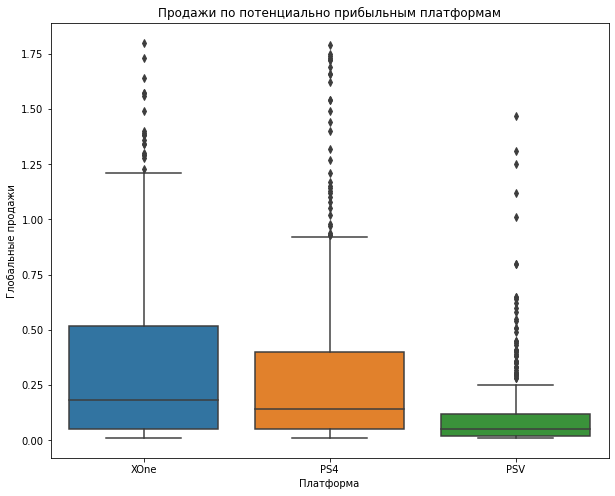

In [64]:
#построим график
plt.figure(figsize=(10, 8))
sns.boxplot(data=platforms_top, x='platform', y='total_sales')
plt.title('Продажи по потенциально прибыльным платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')

Исходя из представленных графиков:
 - наиболее прибыльная платформа за актуальный период это XOne, прибыль от продаж составляет примерно 450 тысяч долларов, а медианное значение составляет около 190 тысяч долларов
 - на втором месте PS4 с прибылью около 350 тысяч долларов и с медианным значением примерно 100 тысяч долларов
 - у PSV значения отличаются на порядок от остальных двух платформ. Прибыль составляем примерно 100 тысяч долларов
 
 Так же, на графике видны многочисленные точки в верху - выбросы. Это значения, которые довольно сильно выбиваются из значених общей выборки. При анализе данных их использовать не стоит, однако, нужно иметь ввиду что они существуют


### Влияние отзывов на продажи

Выделим отдельно необходимые данные для платформы "XOne". И так же, отдельно выведем данные в две таблицы - зависимость от оценки критиков и оценки пользователей

In [65]:
#выделим отдельно необходимые данные для платформы "XOne" и оценку критиков
xone_score_critic = platforms_top.loc[:,['total_sales', 'critic_score', 'platform']]
xone_score_critic = xone_score_critic.query('critic_score > 0 & platform == "XOne"')
xone_score_critic

,total_sales,critic_score,platform
975,1.80,87,XOne
1037,1.73,82,XOne
1125,1.64,82,XOne
1176,1.57,78,XOne
1180,1.57,78,XOne
...,...,...,...
16322,0.01,66,XOne
16392,0.01,53,XOne
16597,0.01,65,XOne
16630,0.01,63,XOne


In [66]:
#выделим отдельно необходимые данные для платформы "XOne" и оценку пользователей
xone_score_user = platforms_top.loc[:,['total_sales', 'user_score', 'platform']]
xone_score_user = xone_score_user.query('user_score > 0 & platform == "XOne"')
xone_score_user

,total_sales,user_score,platform
975,1.80,7.9,XOne
1037,1.73,6.3,XOne
1125,1.64,7.5,XOne
1176,1.57,6.8,XOne
1180,1.57,5.8,XOne
...,...,...,...
16544,0.01,6.8,XOne
16597,0.01,6.0,XOne
16630,0.01,8.2,XOne
16643,0.01,6.6,XOne


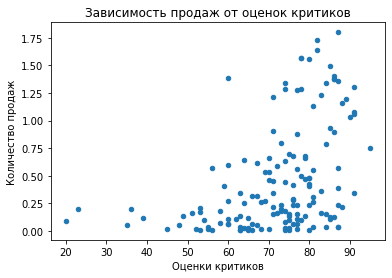

In [67]:
#построим диаграмму рассеивания между продажами и отзывами критиков
xone_score_critic.plot(x='critic_score' , y='total_sales', kind='scatter')
plt.title('Зависимость продаж от оценок критиков')
plt.xlabel('Оценки критиков')
plt.ylabel('Количество продаж')
plt.show()

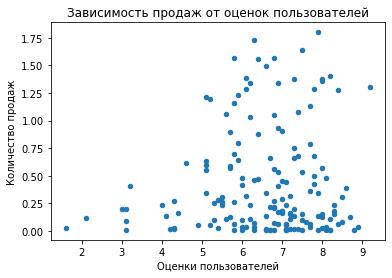

In [68]:
#построим диаграмму рассеивания между продажами и отзывами пользователей
xone_score_user.plot(x='user_score' , y='total_sales', kind='scatter')
plt.title('Зависимость продаж от оценок пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж')
plt.show()

In [69]:
#рассчитаем корреляцию зависимости продаж от оценок критиков
xone_score_critic.corr()

,total_sales,critic_score
total_sales,1.000000,0.433697
critic_score,0.433697,1.000000


In [70]:
#рассчитаем корреляцию заивисимости продаж от оценок пользователей
xone_score_user.corr()

,total_sales,user_score
total_sales,1.00000,0.07989
user_score,0.07989,1.00000


Исходя из графиков и коэффициента корреляции мы видим, что количество продаж зависит от оценок критиков (0.43 коэф. корр-ии) достаточно сильно. А продажи от оценок пользоваталей имеют меньшую зависимость - 0.07 .

Оценим такие же показатели для двух других платформ - PS4 и PSV

In [71]:
#выделим отдельно необходимые данные для платформы "PS4" и оценку критиков
ps4_score_critic = platforms_top.loc[:,['total_sales', 'critic_score', 'platform']]
ps4_score_critic = ps4_score_critic.query('critic_score > 0 & platform == "PS4"')
ps4_score_critic

,total_sales,critic_score,platform
976,1.79,75,PS4
1007,1.74,82,PS4
1026,1.72,63,PS4
1028,1.73,54,PS4
1035,1.72,61,PS4
...,...,...,...
16486,0.01,42,PS4
16499,0.01,70,PS4
16500,0.01,69,PS4
16526,0.01,61,PS4


In [72]:
#выделим отдельно необходимые данные для платформы "PS4" и оценку пользователей
ps4_score_user = platforms_top.loc[:,['total_sales', 'user_score', 'platform']]
ps4_score_user = ps4_score_user.query('user_score > 0 & platform == "PS4"')
ps4_score_user

,total_sales,user_score,platform
976,1.79,7.3,PS4
1007,1.74,4.9,PS4
1026,1.72,6.6,PS4
1028,1.73,6.5,PS4
1035,1.72,5.4,PS4
...,...,...,...
16486,0.01,2.3,PS4
16499,0.01,6.8,PS4
16500,0.01,7.5,PS4
16526,0.01,7.9,PS4


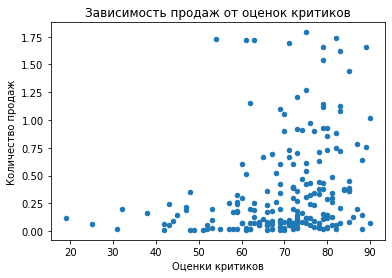

In [73]:
#построим диаграмму рассеивания между продажами и отзывами критиков
ps4_score_critic.plot(x='critic_score' , y='total_sales', kind='scatter')
plt.title('Зависимость продаж от оценок критиков')
plt.xlabel('Оценки критиков')
plt.ylabel('Количество продаж')
plt.show()

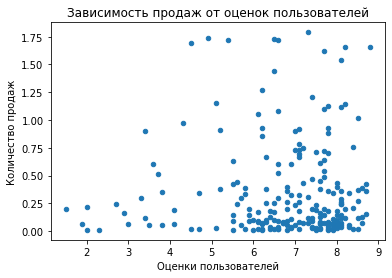

In [74]:
#построим диаграмму рассеивания между продажами и отзывами пользователей
ps4_score_user.plot(x='user_score' , y='total_sales', kind='scatter')
plt.title('Зависимость продаж от оценок пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж')
plt.show()

In [75]:
#рассчитаем корреляцию зависимости продаж от оценок критиков
ps4_score_critic.corr()

,total_sales,critic_score
total_sales,1.000000,0.271837
critic_score,0.271837,1.000000


In [76]:
#рассчитаем корреляцию зависимости продаж от оценок пользователей
ps4_score_user.corr()

,total_sales,user_score
total_sales,1.000000,0.016816
user_score,0.016816,1.000000


In [77]:
#выделим отдельно необходимые данные для платформы "PSV" и оценку критиков
psv_score_critic = platforms_top.loc[:,['total_sales', 'critic_score', 'platform']]
psv_score_critic = psv_score_critic.query('critic_score > 0 & platform == "PSV"')
psv_score_critic

,total_sales,critic_score,platform
1294,1.47,33,PSV
1485,1.31,70,PSV
1595,1.25,88,PSV
1831,1.12,93,PSV
2566,0.80,78,PSV
...,...,...,...
15198,0.02,64,PSV
15512,0.02,70,PSV
16260,0.01,58,PSV
16273,0.01,66,PSV


In [78]:
#выделим отдельно необходимые данные для платформы "PSV" и оценку пользователей
psv_score_user = platforms_top.loc[:,['total_sales', 'user_score', 'platform']]
psv_score_user = psv_score_user.query('user_score > 0 & platform == "PSV"')
psv_score_user

,total_sales,user_score,platform
1294,1.47,4.8,PSV
1485,1.31,7.2,PSV
1595,1.25,8.6,PSV
1831,1.12,9.2,PSV
2566,0.80,8.9,PSV
...,...,...,...
16260,0.01,7.7,PSV
16273,0.01,5.7,PSV
16374,0.01,8.0,PSV
16547,0.01,7.5,PSV


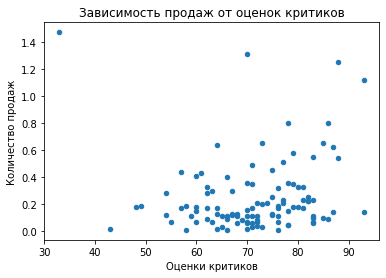

In [79]:
#построим диаграмму рассеивания между продажами и отзывами критиков
psv_score_critic.plot(x='critic_score' , y='total_sales', kind='scatter')
plt.title('Зависимость продаж от оценок критиков')
plt.xlabel('Оценки критиков')
plt.ylabel('Количество продаж')
plt.show()

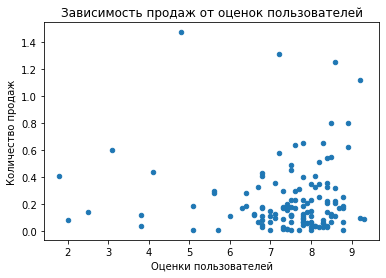

In [80]:
#построим диаграмму рассеивания между продажами и отзывами пользователей
psv_score_user.plot(x='user_score' , y='total_sales', kind='scatter')
plt.title('Зависимость продаж от оценок пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж')
plt.show()

In [81]:
#рассчитаем корреляцию зависимости продаж от оценок критиков
psv_score_critic.corr()

,total_sales,critic_score
total_sales,1.000000,0.094488
critic_score,0.094488,1.000000


In [82]:
#рассчитаем корреляцию зависимости продаж от оценок пользователей
psv_score_user.corr()

,total_sales,user_score
total_sales,1.000000,-0.004339
user_score,-0.004339,1.000000


Что касается платформ, находящихся на 2 и 3 месте:

 - у платформы "PS4" зависимость продаж от мнения критиков составила 0.27, а от мнения пользователей - 0.016. 
 
 - У платформы "PSV" самые низкие показатели зависимости продаж от оценок критиков 0,094, а пользователей и того меньше  -0,004.Это значит, что оценка пользователей влияет незначительно на продажи игр
  
  Последнее можно указать как общую черту для всех платформ в наибольшим количеством продаж в 2016 году. Поэтому в целом влияние отзывов на дальнейшие продажи игр достаточно значительно - можно сказать, что это отчасти выступает основой для того, чтобы пользователи приобретали новые игры

### Распределение игр по жанрам

In [83]:
data_new_games_1 = data_new.groupby('genre').agg({'name': 'count', 'total_sales':'mean'}).sort_values(by='total_sales', ascending=False)
data_new_games_1

,name,total_sales
genre,,
Shooter,235,1.296723
Platform,85,0.717647
Sports,267,0.678127
Role-Playing,370,0.521081
Racing,115,0.465217
Misc,192,0.442917
Simulation,80,0.439000
Action,1031,0.427856
Fighting,109,0.408165


Наиболее успешные в продажах жанры игр это шутеры(Shooter), платформы(Platform), спортивные игры(Sports) и ролевые(Role-Playing). 
 - шутеры, несмотря на их небольшое количество лидируют по данным в продажах. Такой успех можно пояснить тем, что зачастую в них играют компаниями (та же Counter-Strike, Battlefield  и прочие)
 - а вот игры экшен, несмотря на самое большое количество занимают только 8 место. Поэтому можно рассудить, что игры, занимающие более высокие места в рейтинге несмотря на меньшее количество выходят более качественными или имеют какие-то фишки, благодаря которым количество пользователей у них больше 

### Портреты пользователей

In [84]:
#выделим отдельно данные по региону Северная Америка
data_na = data_new.query('na_sales > 0')

In [85]:
#выделим отдельно данные по региону Европа
data_eu = data_new.query('eu_sales > 0')

In [86]:
#выделим отдельно данные по региону Япония
data_jp = data_new.query('jp_sales > 0')

In [87]:
#сформируем топ-5 для Северной Америки
data_na_platform = data_na.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
data_na_platform

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


In [88]:
#сформируем топ-5 для Европы
data_eu_platform = data_eu.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
data_eu_platform

,eu_sales
platform,
PS4,141.09
PS3,106.85
X360,74.52
XOne,51.59
3DS,42.64


In [89]:
#сформируем топ-5 для Японии
data_jp_platform = data_jp.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()
data_jp_platform

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


- Топ-5 платформ для жителей Северной Америки: X360(28%), PS4(21,7%), PS3(20.7%), XOne(18.5%), 3DS(11.1%)
- Топ-5 платформ для жителей Европы: PS4(33.6%), PS3(25.6%), X360(17.7%), XOne(13.1%), 3DS(10%)
- Топ-5 платформ для жителей Японии: 3DS(50.7%), PS3(20.4%), PSV(12.2%), PS4(9.2%), WiiU(7.5%)

- лидирущая x-box 28% занимает в Европе третье место с долей 17,7% и отсутствует в топ-5 Японии
- во всех регионах в топе PS4 и PS3
Несмотря на различия во всех регионах в топ-5 попадают платформы компании Sony. В целом различия можно так же объяснить разным местонахождением компаний, где разрабатываются игровые платформы

Оценим какие жанры игр предпочитают игроки разных регионов

In [90]:
#сформируем топ-5 жанров для Северной Америки
data_na_genre = data_na.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
data_na_genre

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


In [91]:
#сформируем топ-5 жанров для Европы
data_eu_genre = data_eu.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
data_eu_genre

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.08
Role-Playing,48.53
Racing,27.29


In [92]:
#сформируем топ-5 жанров для Японии
data_jp_genre = data_jp.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()
data_jp_genre

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


- топ-5 игр для Северной Америки - Action, Shooter, Sports, Role-Playing ,Misc  
- топ-5 игр для Европы - Action, Shooter, Sports, Role-Playing, Racing
- топ-5 игр для Японии - Role-Playing, Action, Misc, Simulation, Fightinge

- предпочтения пользователей в Северной Америке и Европе в большей степени совпадают
- предпочтения игроков Японии имеют несколько иной характер - они предпочитают игры более сложные, где присутсвует размышление и более глубокий смысл

Посмотрим, как влияет рейтинг игр на продажи

In [93]:
#рейтинг игр для Северной Америки
data_na_rating = data_na.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
data_na_rating

,na_sales
rating,
M,231.57
E,114.37
NR,103.31
E10+,75.70
T,66.02


In [94]:
#рейтинг игр для Европы
data_eu_rating = data_eu.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
data_eu_rating

,eu_sales
rating,
M,193.96
E,113.02
NR,91.50
E10+,55.37
T,52.96


In [95]:
#рейтинг игр для Японии
data_jp_rating = data_jp.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
data_jp_rating

,jp_sales
rating,
NR,108.84
E,28.33
T,26.02
M,21.20
E10+,8.19


- для Северной Америки лидируют игры с рейтингом М(для взрослых), Е(для всех), Е10+(для всех от 10 лет и старше), Т(подросткам) и большое количество NR(игр, с неустановленным рейтингом)
- для Европы - М(для взрослых), Е(для всех), NR(игры, с неустановленным рейтингом), Е10+(для всех от 10 лет и старше), Т(подросткам) 
- в Японии лидируют NR(игры, с неустановленным рейтингом), Е(для всех), Т(подросткам), М(для взрослых), Е10+(для всех от 10 лет и старше)

- В Европе и Северной Америке схожи интересы пользователей - по большей части это взрослые люди 18+. Учитывая, что в топ-5 игр обоих этих регионов входят шутеры и экшн - зачастую эти игры имеют рейтинг 18+, поэтому результат выглядит вполне логично.
- В Японии преимущественно игры без рейтинга, а затем с общим пользованием(и взрослые и дети). Игры для взрослых только на 4 месте, в отличие от остальных двух регионов, где такие игры на первых местах. В целом  в этом регионе разработчики игр ориентируются на подрастающее поколение


### Проверка гипотез

Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Установим нулевую и альтернативную гипотезы - 
- H_0 : Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H_a : Средние пользовательские рейтинги платформ Xbox One и PC различаются

Будем использовать тест Стьюдента, т.к у нас гипотеза о равенстве двух независимых друг от друга выборок(в нашем случае - рейтинги игроков и жанров)

In [96]:
#сначала исключим рейтинги пользователей, пропуски которых мы заменили значением "-1" и оставим данные только про платформу XOne
user_xone = data_new[(data_new['user_score'] > 0) & (data_new['platform'] == 'XOne')]['user_score']

In [97]:
#аналогично и для второй платформы
user_pc = data_new[(data_new['user_score'] > 0) & (data_new['platform'] == 'PC')]['user_score']

In [98]:
#проверим гипотезу
results = st.ttest_ind(user_xone, user_pc)
alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.5535080500643661
Не отвергаем нулевую гипотезу


Для гипотезы №1 нулевая гипотеза остается актуальной. Можно дополнительно проверить это, посчитав среднее для пользователей Xbox One и PC

In [99]:
user_xone.mean()

6.521428571428572

In [100]:
#для пользователей PC
user_pc.mean()

6.4286407766990274

Как видим, средние значения рейтинга очень близки по значению друг к другу, что еще раз склоняет нас в сторону нулевой гипотезы - средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Гипотеза 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Установим нулевую и альтернативную гипотезы -

- H_0 : Средние пользовательские рейтинги жанров Action и Sports одинаковые
- H_a : Средние пользовательские рейтинги жанров Action и Sports различаются

In [101]:
#сначала исключим рейтинги пользователей, пропуски которых мы заменили значением "-1" и оставим данные только про жанр Action
user_action = data_new[(data_new['user_score'] > 0) & (data_new['genre'] == 'Action')]['user_score']

In [102]:
#аналогично и для второго жанра Sports
user_sports = data_new[(data_new['user_score'] > 0) & (data_new['genre'] == 'Sports')]['user_score']

In [103]:
#проверим гипотезу
results = st.ttest_ind(user_action, user_sports)
alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 4.8045233804629176e-26
Отвергаем нулевую гипотезу


Для гипотезы №2 нулевая гипотеза не подтверждается, это значит что разница между рейтингами всё же возможна. Можем аналогично проверить как и гипотезу №1

In [104]:
#для жанра Action
user_action.mean()

6.825047801147227

In [105]:
#для жанра Sports
user_sports.mean()

5.455670103092784

Как мы видим, значения действительно довольно разные. Однако у нас нет достаточных оснований для того, чтобы отвергнуть или принять альтернативную гипотезу 

## Общий вывод

В данном проекте было проведено исследование: Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

1. Был открыт файл с данными и изучена общая информация
2. Была выполнена предобработка данных: анализ, изменение типов данных, обработка пропусков.В результате предобработки был сохранен датафрейм на 99%.
3. Добавлены новые столбцы с новыми параметрами
4. Проведен исследовательский анализ данных:
 - сколько игр выпускалось в разные годы. Рост количества игр начался с 1990 года до 2008 и затем произошел довольно резкий спад. 
 - как менялись продажи по платформам. С большим отрывом лидирует Sony PlayStation2. На втором месте X-Box360, затем Sony PlayStation3 и Wii. Затем за ними следуют DS и PS. В среднем каждая из игровых платформ существует около 10 лет. А пик продаж у каждой приходится в среднем на 4-5 год после выпуска. Учитывая эти моменты, на будущую часть исследования в качестве актуального периода будет период начиная с 2012 года - так можно будет проследить динамику развития платформ,пик продаж которых может произойти на 2017 год.
 - потенциально прибыльные платформы.Это платформы: PS4, XOne, PSV. Однако, это не значит, что эти платформы будут в топе и на 2017 год
 - постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
   - наиболее прибыльная платформа за актуальный период это XOne, прибыль от продаж составляет примерно 450 тысяч долларов, а медианное значение составляет около 190 тысяч долларов
   - на втором месте PS4 с прибылью около 350 тысяч долларов и с медианным значением примерно 100 тысяч долларов
   - у PSV значения отличаются на порядок от остальных двух платформ. Прибыль составляет примерно 100 тысяч долларов
 - как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.  Для платформы XOne количество продаж зависит от оценок критиков (0.43 коэф. корр-ии) достаточно сильно. А продажи от оценок пользоваталей имеют меньшую зависимость - 0.07 .
     Что касается платформ, находящихся на 2 и 3 месте:
   - у платформы "PS4" зависимость продаж от мнения критиков составила 0.27, а от мнения пользователей - 0.016.
   - У платформы "PSV" самые низкие показатели зависимости продаж от оценок критиков 0,094, а пользователей и того меньше -0,004.
 - распределение игр по жанрам. Наиболее успешные в продажах жанры игр это шутеры(Shooter), платформы(Platform), спортивные игры(Sports) и ролевые(Role-Playing)
4. Составлен портрет пользователя каждого региона
  - топ-5 игр для Северной Америки - Action, Shooter, Sports, Role-Playing ,Misc
  - топ-5 игр для Европы - Action, Shooter, Sports, Role-Playing, Racing
  - топ-5 игр для Японии - Role-Playing, Action, Misc, Simulation, Fightinge

  - для Северной Америки лидируют игры с рейтингом М(для взрослых), Е(для всех), Е10+(для всех от 10 лет и старше), Т(подросткам) и большое количество NR(игр, с неустановленным рейтингом)
  - для Европы - М(для взрослых), Е(для всех), NR(игры, с неустановленным рейтингом), Е10+(для всех от 10 лет и старше), Т(подросткам) 
  - в Японии лидируют NR(игры, с неустановленным рейтингом), Е(для всех), Т(подросткам), М(для взрослых), Е10+(для всех от 10 лет и старше)
5. Проверены гипотезы.
 - Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
 
Для гипотезы №1 нулевая гипотеза остается актуальной - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
  - Гипотеза 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные
  
Для гипотезы №2 нулевая гипотеза не подтверждается, это значит что разница между рейтингами всё же возможна